# Tree statistics

In [2]:
import os
import sys
from collections import defaultdict
from functools import partial
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.errors import SettingWithCopyWarning
import numpy as np
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

from tqdm.notebook import tqdm 
from math import factorial, log, log10, log1p, floor, ceil
from scipy.stats import chi2

import multiprocess

sns.set()
sns.set_style("ticks")

import tskit
import msprime

import geneinfo as gi
gi.email('kaspermunch@birc.au.dk')

# scale down size of default plots
sns.set_context("paper")
import matplotlib as mpl
scale = 0.8
d = dict([(k, v*scale) for (k, v) in sns.plotting_context('paper').items()])
d['figure.figsize'] = [5.4, 3.5]
mpl.rcParams.update(d)

def modpath(p, parent=None, base=None, suffix=None):
    par, name = os.path.split(p)
    name_no_suffix, suf = os.path.splitext(name)
    if type(suffix) is str:
        suf = suffix
    if parent is not None:
        par = parent
    if base is not None:
        name_no_suffix = base
    new_path = os.path.join(par, name_no_suffix + suf)
    if type(suffix) is tuple:
        assert len(suffix) == 2
        new_path, nsubs = re.subn(r'{}$'.format(suffix[0]), suffix[1], new_path)
        assert nsubs == 1, nsubs
    return new_path

In [3]:
def plot(ts):
    num_windows = 15000
    windows = np.linspace(0, ts.sequence_length, num_windows + 1)
    pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(num_windows)]
    
    fig, ax = plt.subplots(2, 1, figsize=(25, 5), sharex=True)
    ax[0].scatter(pos, ts.Tajimas_D(windows=windows), s=2) ;
    ax[0].set_ylabel("Tajima's D")
    ax[1].scatter(pos, ts.diversity(windows=windows), s=2)
    ax[1].set_ylabel("diversity");
    ax[1].set_yscale("log")
    # ax[2].scatter(pos, ts.segregating_sites(windows=windows), s=2)
    # ax[2].set_ylabel("segregating sites")
    # ax[2].set_yscale("log")
    ax[1].set_xlim(left=0);

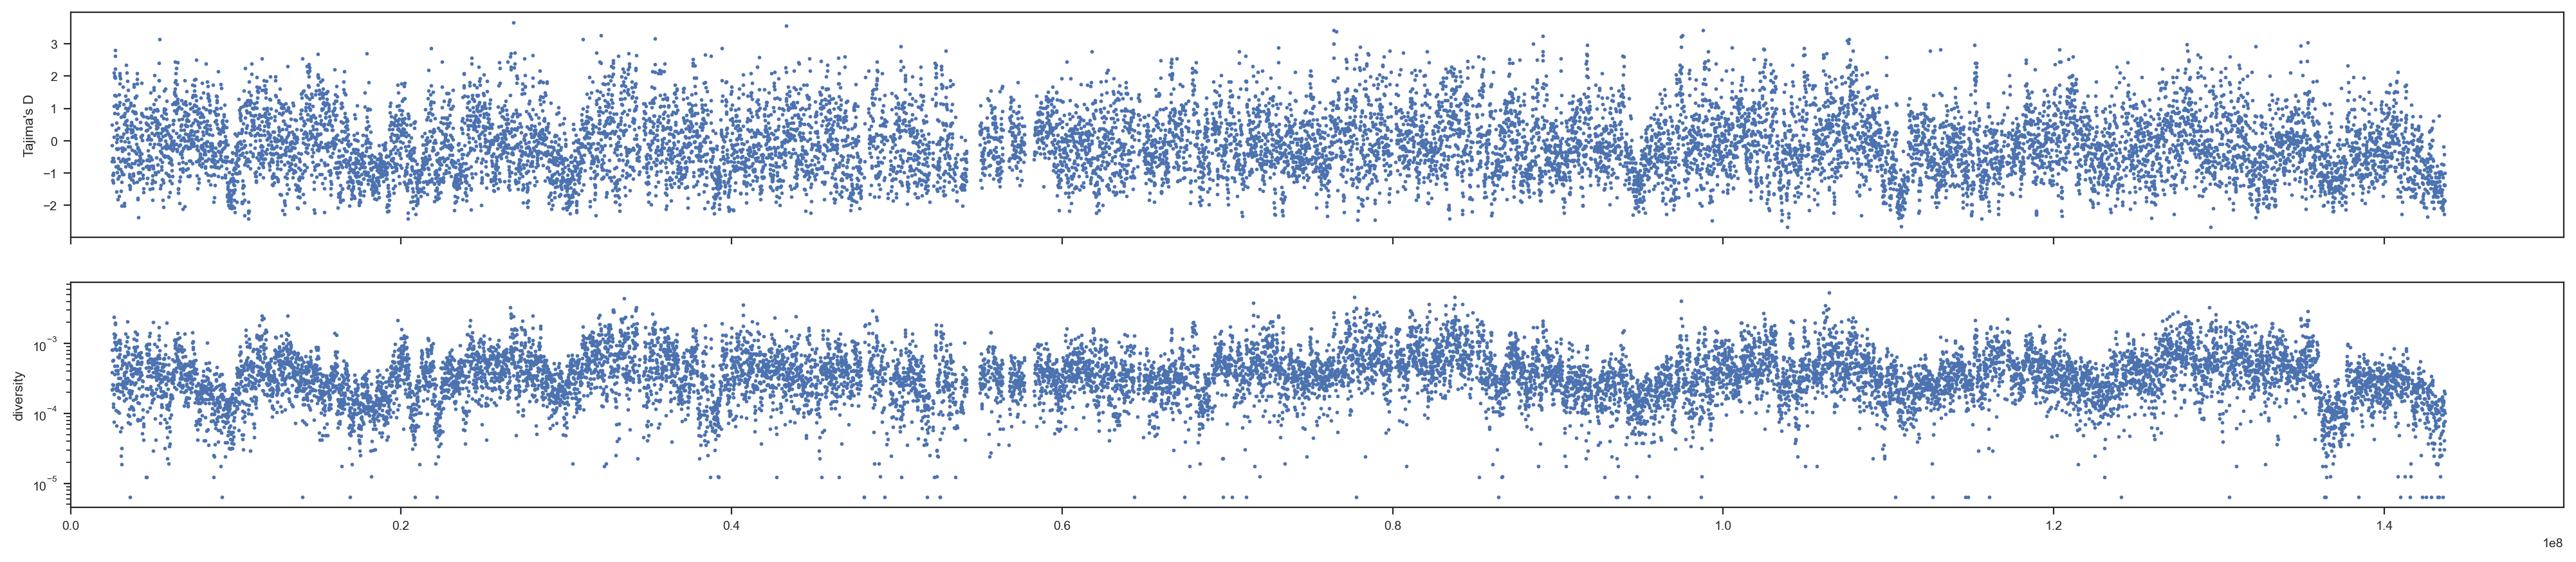

In [72]:
plot(tskit.load('../data/chromhapX_tskit.trees'))

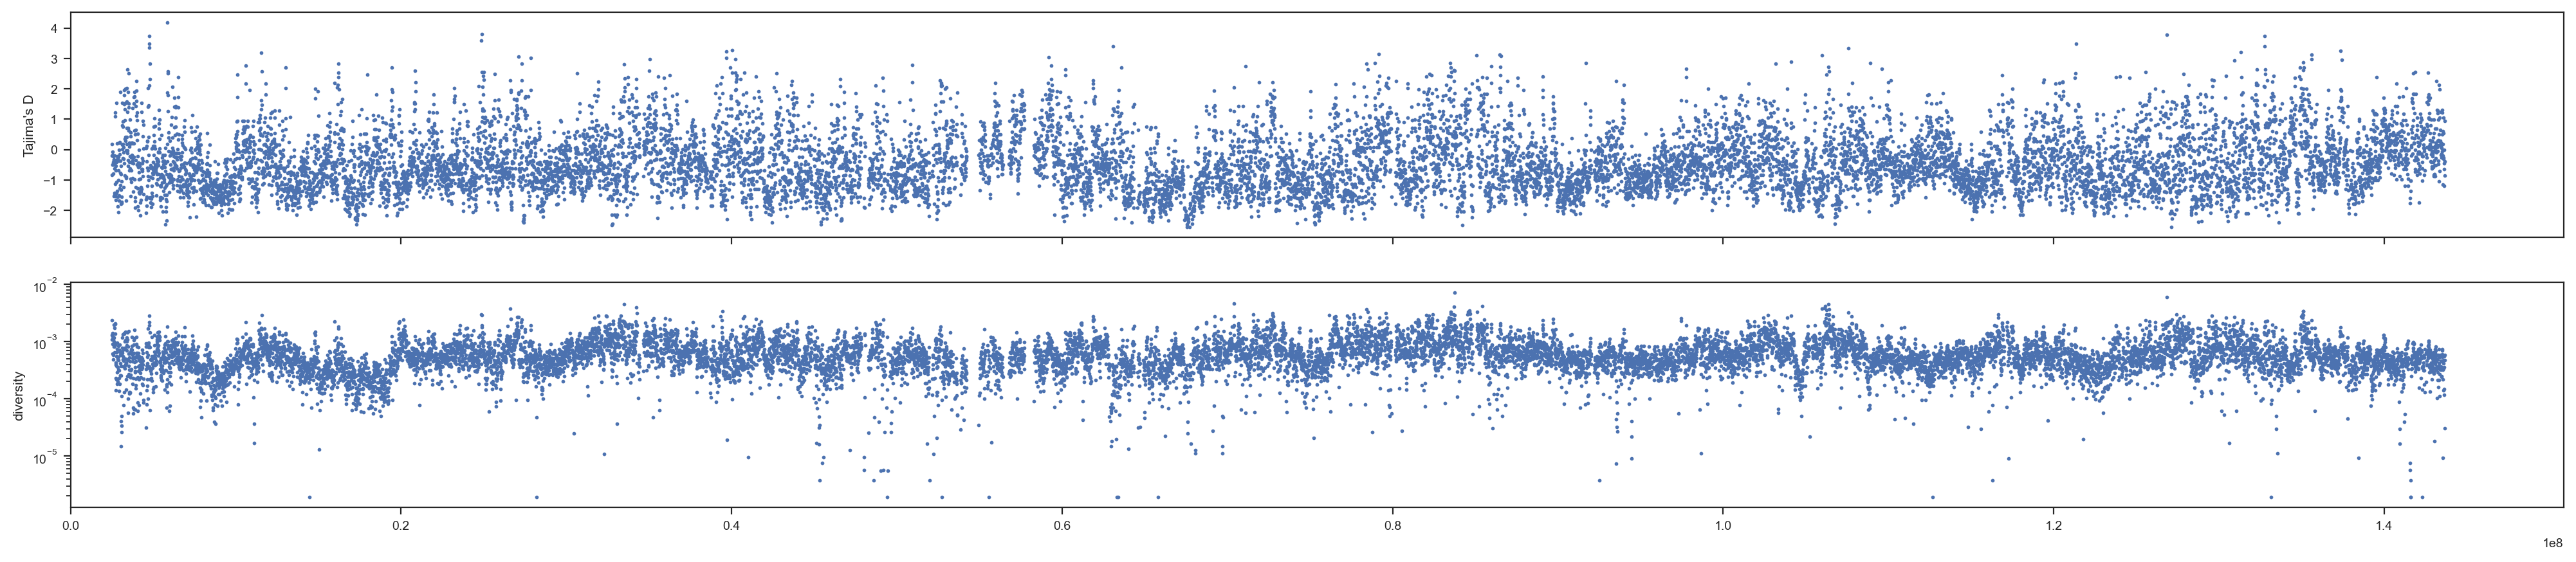

In [73]:
plot(tskit.load('../data/Tanzania_Olive_relate_chromhapX.trees'))

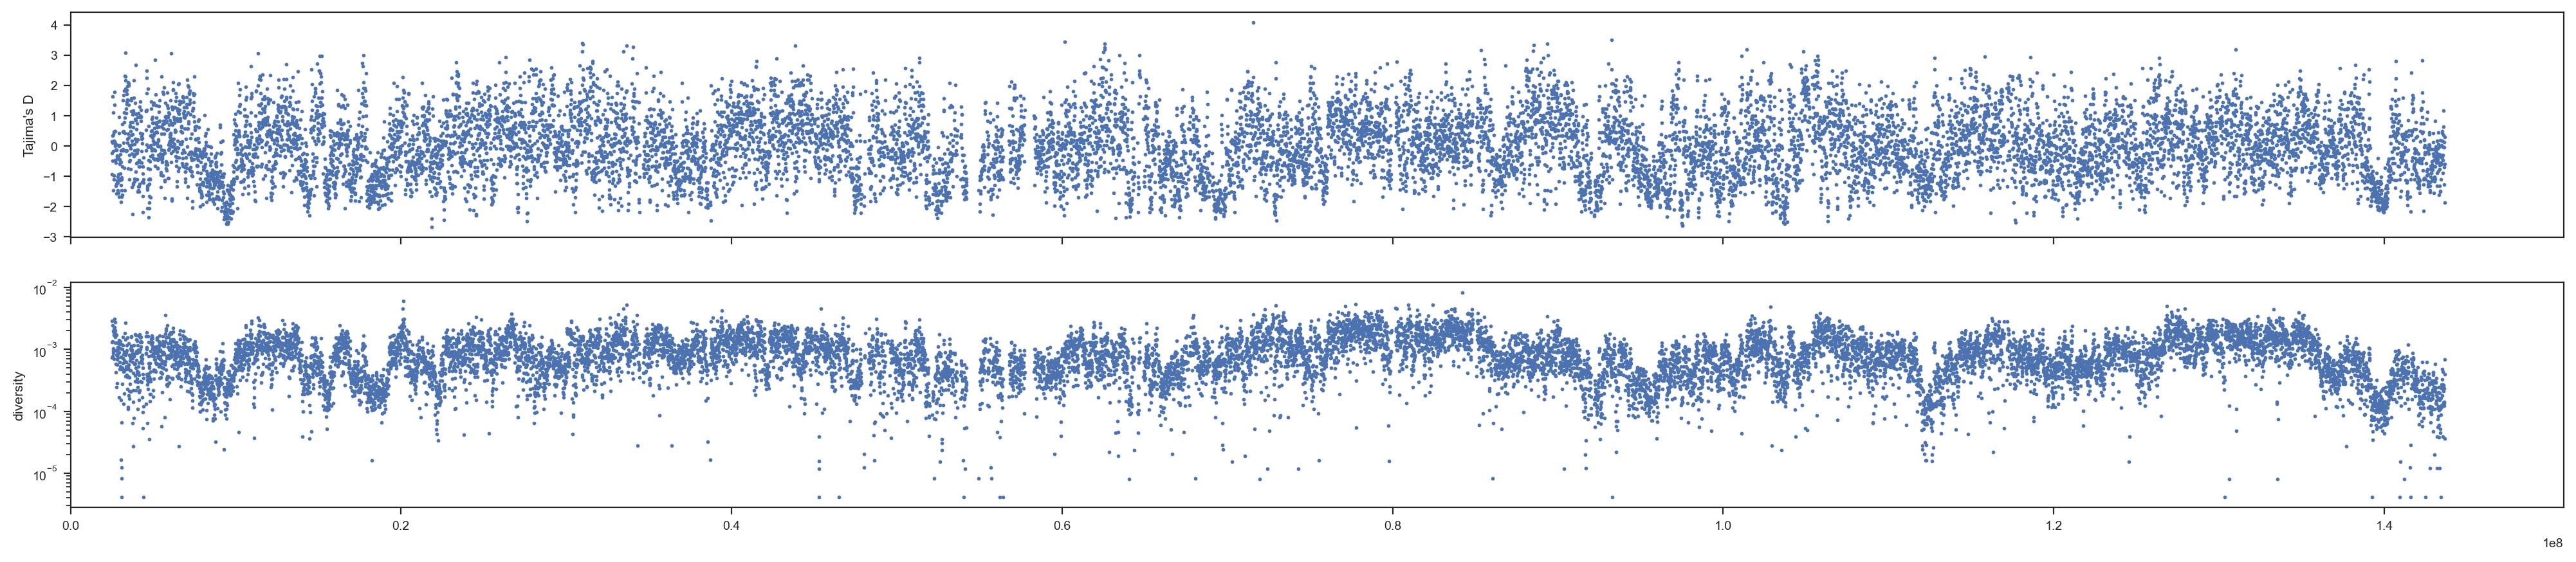

In [74]:
plot(tskit.load('../data/Mikumi_relate_chromhapX.trees'))

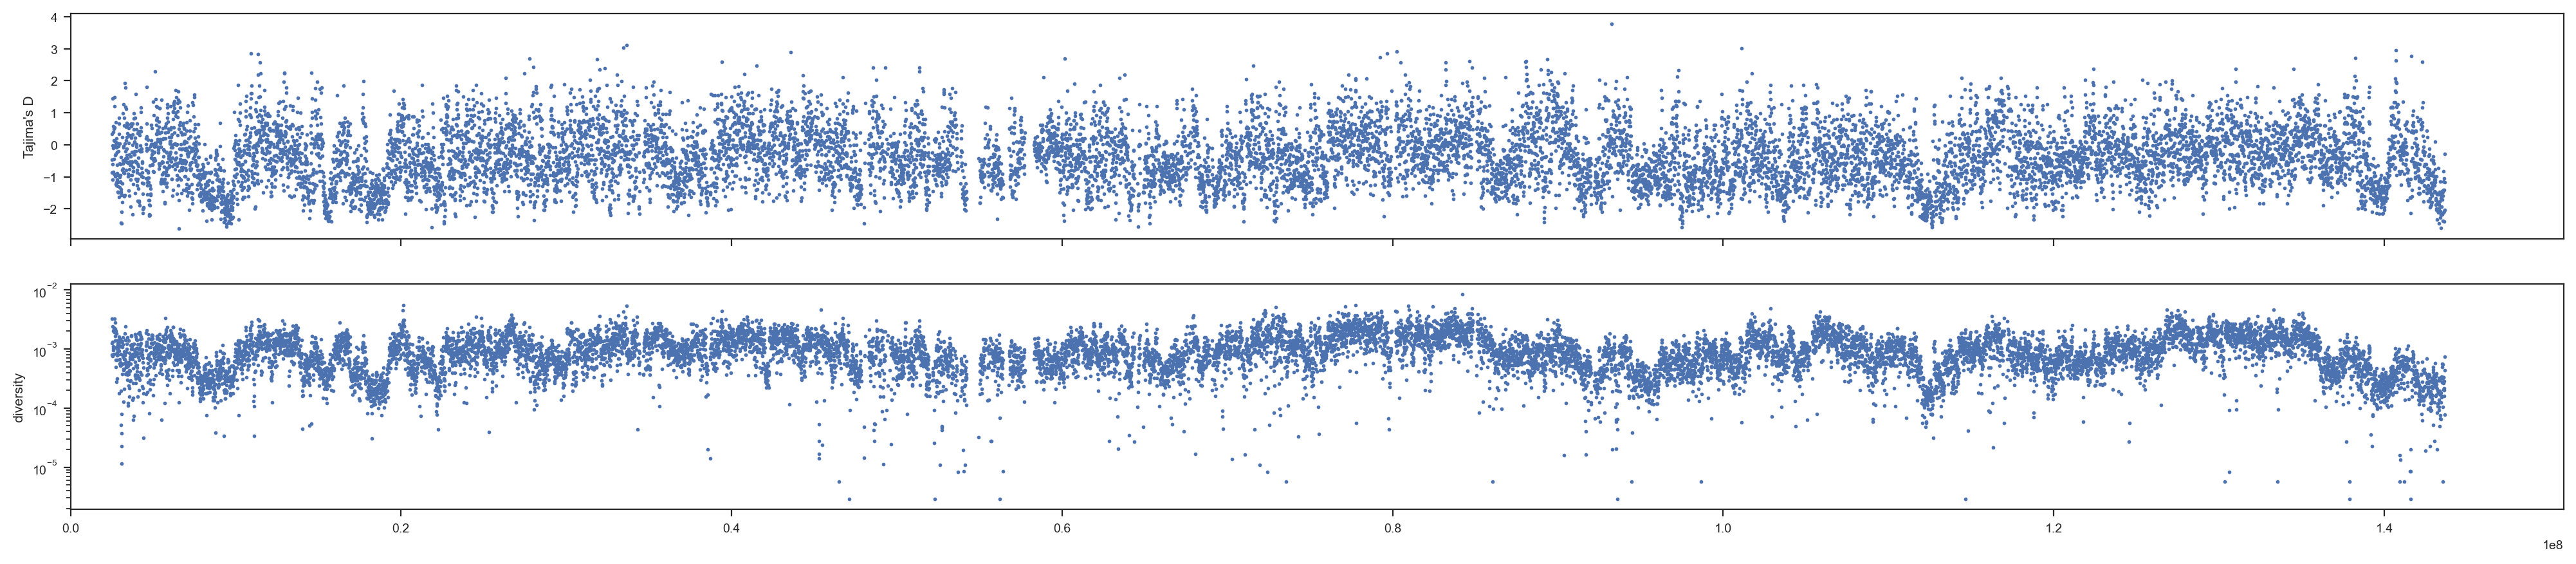

In [75]:
plot(tskit.load('../data/Eastern_Yellow_relate_chromhapX.trees'))

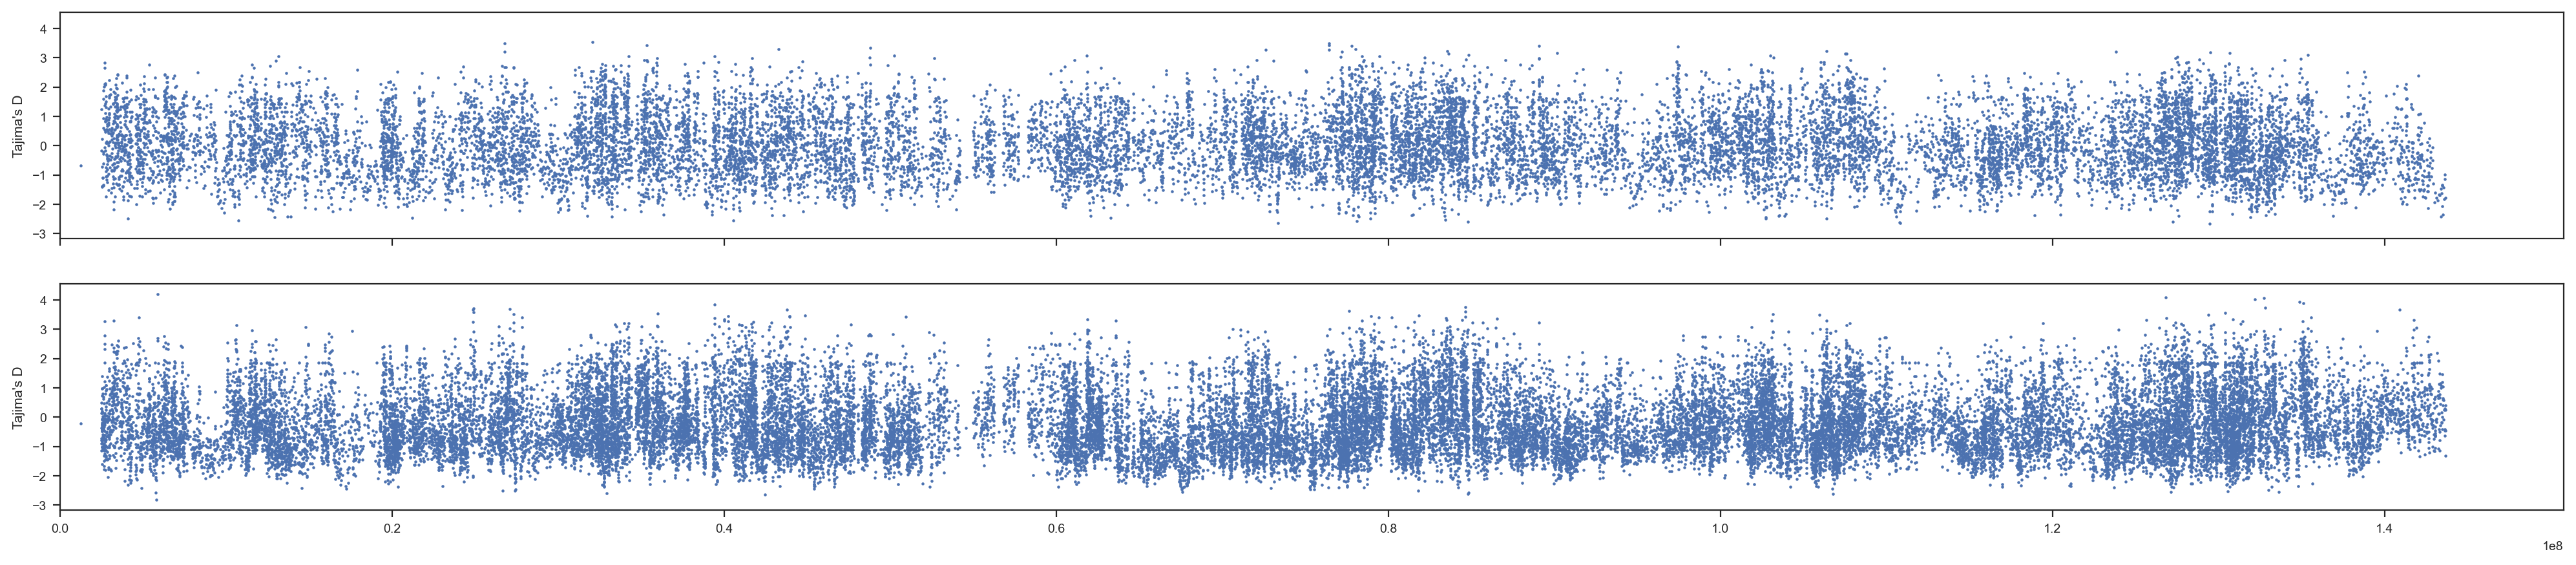

In [112]:
num_windows = 15000
fig, ax = plt.subplots(2, 1, figsize=(25, 5), sharex=True, sharey=True)
ts = tskit.load('../data/chromhapX_tskit.trees')
# windows = np.linspace(0, ts.sequence_length, num_windows + 1)
windows = list(ts.breakpoints())
pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(len(windows)-1)]
ax[0].scatter(pos, ts.Tajimas_D(windows=windows), s=1) ;
ax[0].set_ylabel("Tajima's D")
ts = tskit.load('../data/Tanzania_Olive_relate_chromhapX.trees')
# windows = np.linspace(0, ts.sequence_length, num_windows + 1)
windows = list(ts.breakpoints())
pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(len(windows)-1)]
ax[1].scatter(pos, ts.Tajimas_D(windows=windows), s=1)
ax[1].set_ylabel("Tajima's D");
ax[1].set_xlim(left=0);

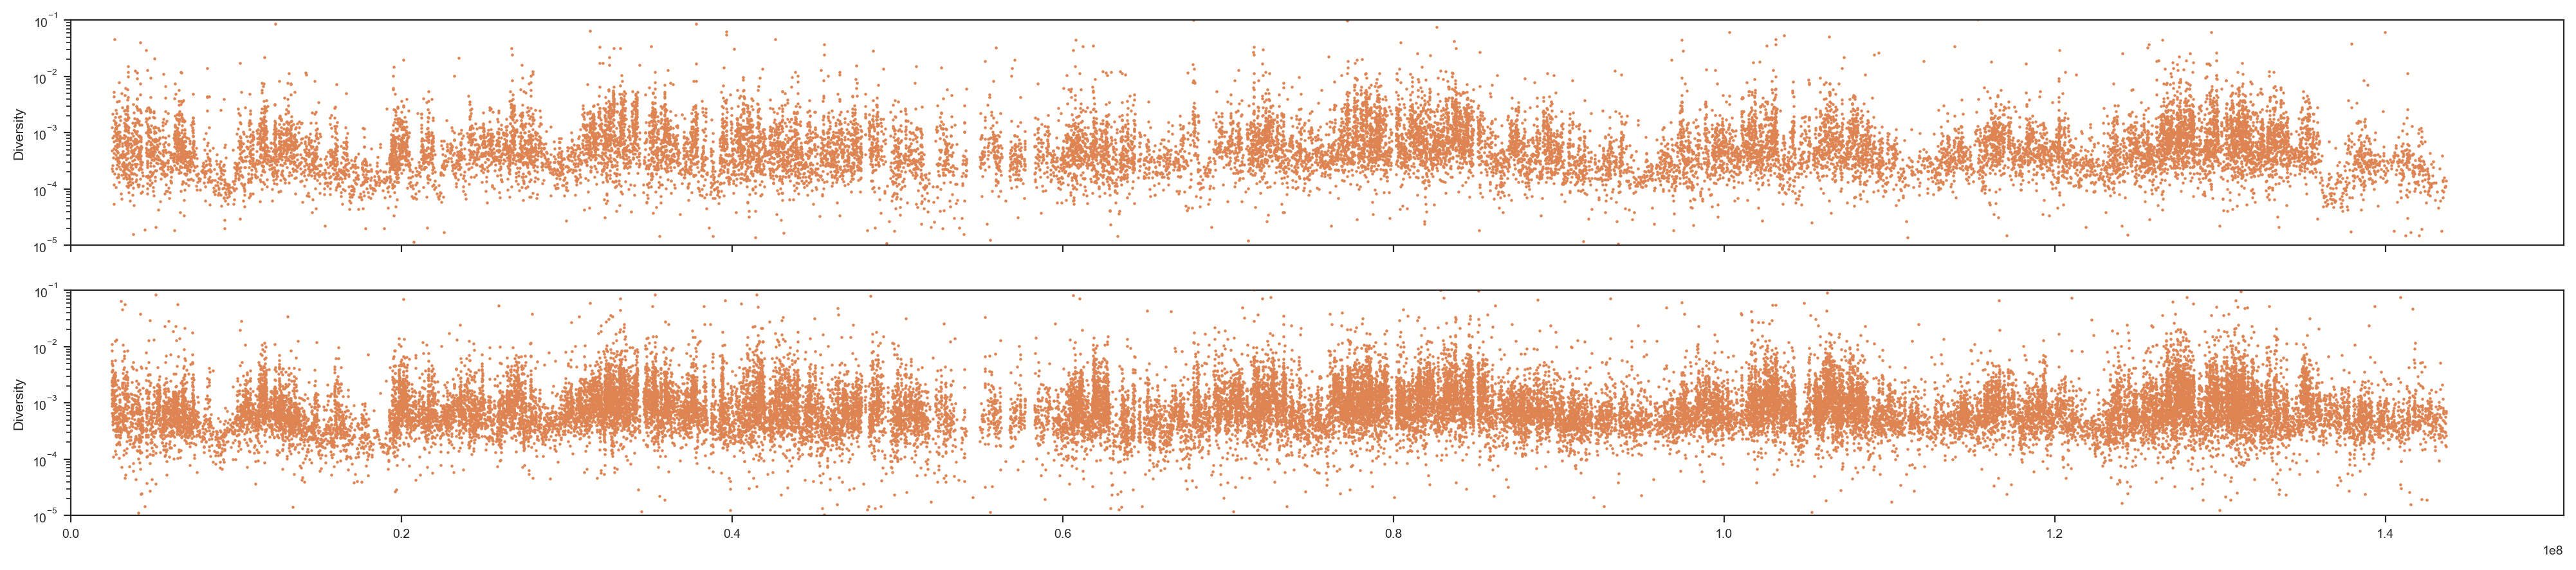

In [111]:
num_windows = 15000
fig, ax = plt.subplots(2, 1, figsize=(25, 5), sharex=True, sharey=True)
ts = tskit.load('../data/chromhapX_tskit.trees')
# windows = np.linspace(0, ts.sequence_length, num_windows + 1)
windows = list(ts.breakpoints())
pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(len(windows)-1)]
ax[0].scatter(pos, ts.diversity(windows=windows), s=1, c='C1')
ax[0].set_ylabel("Diversity");
ax[0].set_yscale("log")
ax[0].set_xlim(left=0);
ts = tskit.load('../data/Tanzania_Olive_relate_chromhapX.trees')
# windows = np.linspace(0, ts.sequence_length, num_windows + 1)
windows = list(ts.breakpoints())
pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(len(windows)-1)]
ax[1].scatter(pos, ts.diversity(windows=windows), s=1, c='C1')
ax[1].set_ylabel("Diversity");
ax[1].set_yscale("log")
ax[1].set_xlim(left=0);
ax[1].set_ylim((1e-5, 1e-1));

In [96]:
ts.breakpoints()

array([0.00000000e+00, 9.33333333e+03, 1.86666667e+04, ...,
       1.39981333e+08, 1.39990667e+08, 1.40000000e+08])

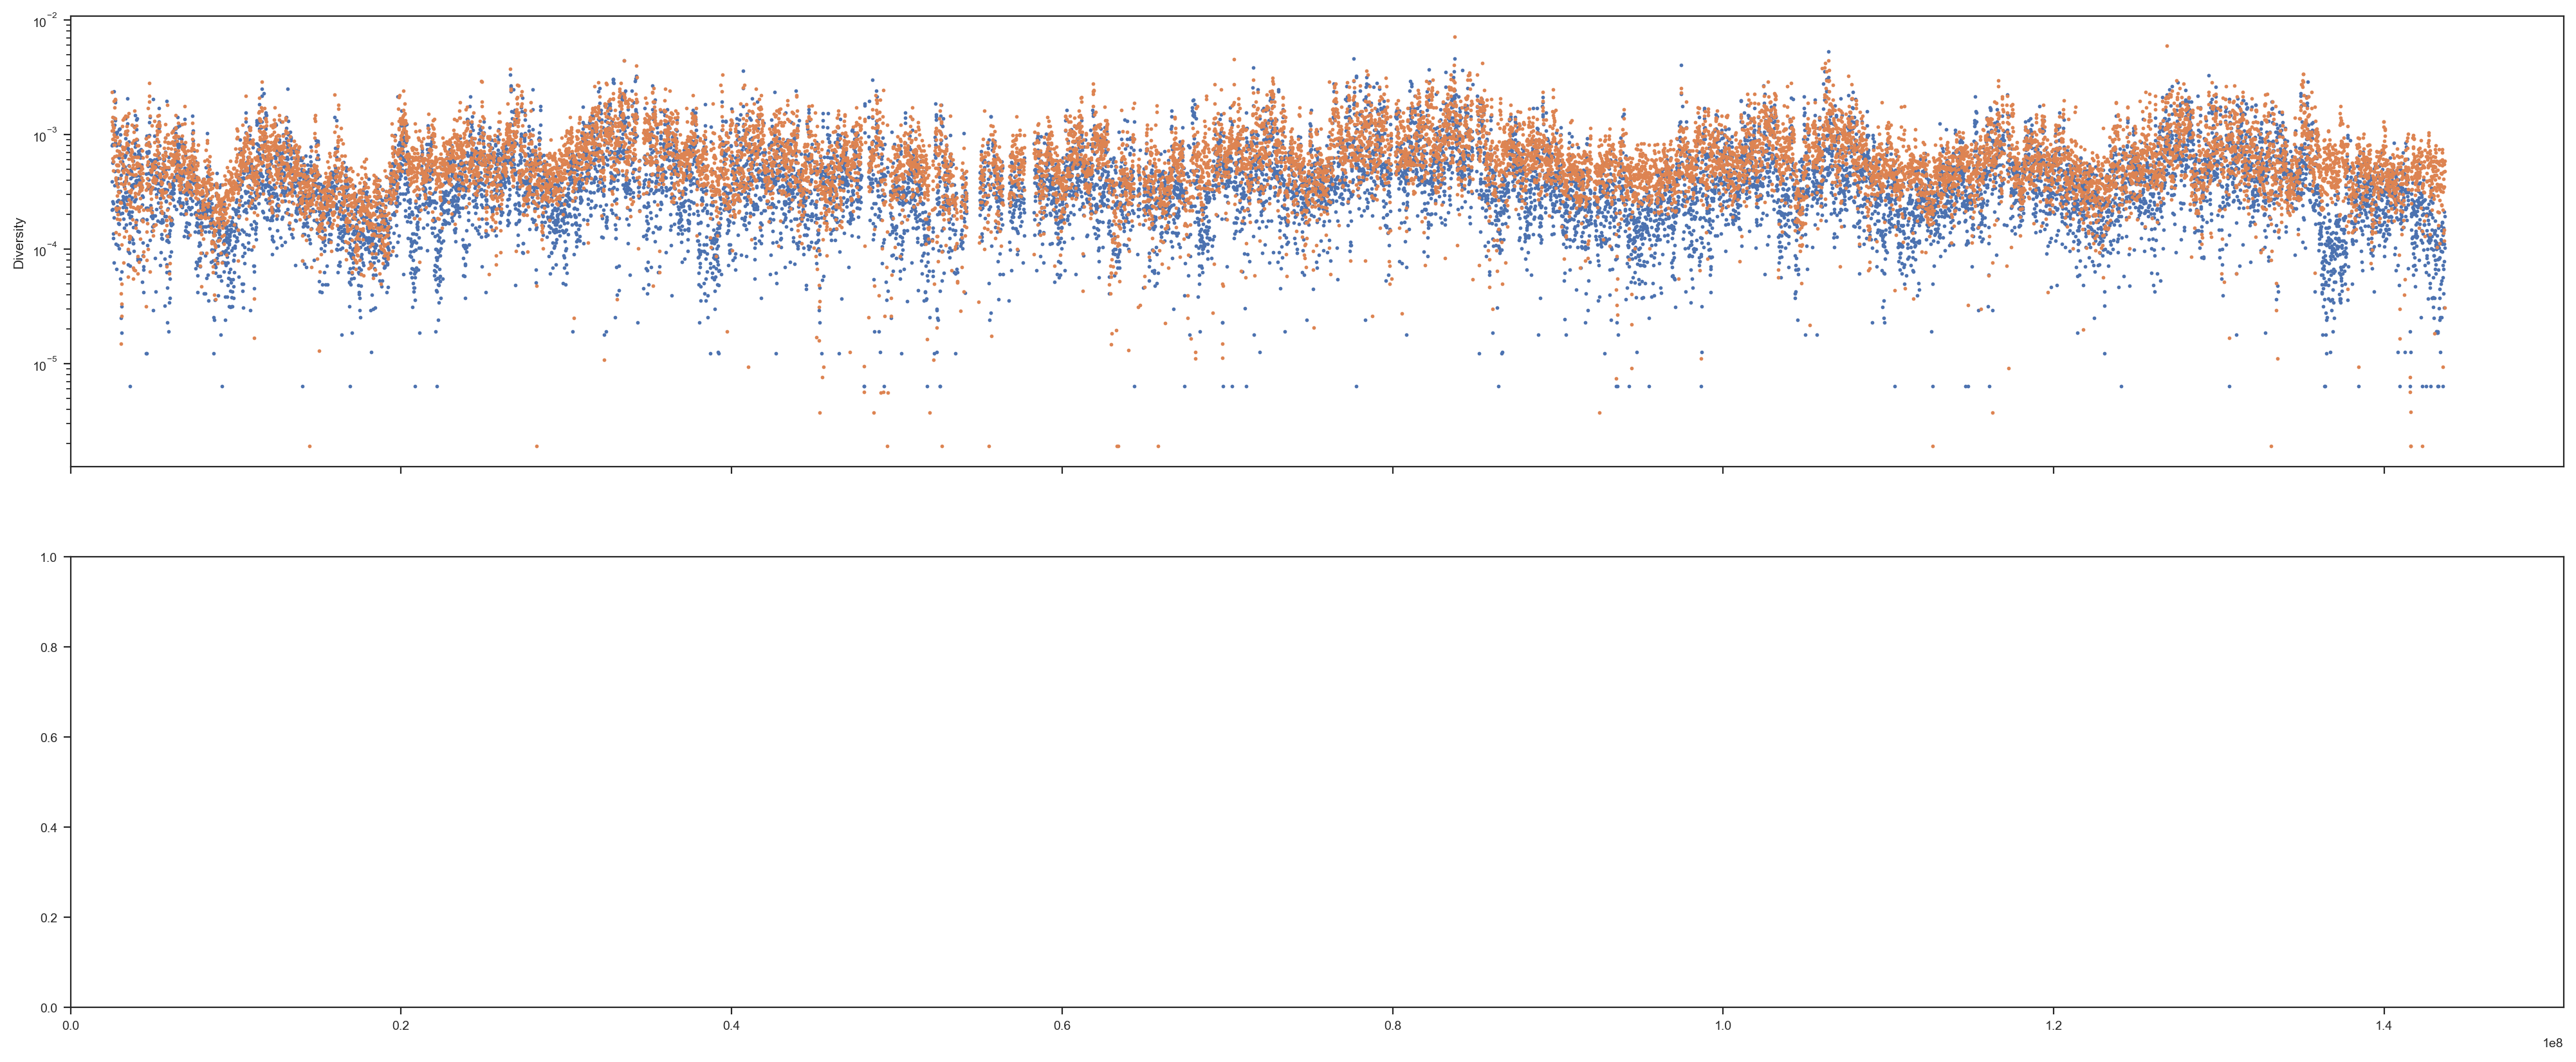

In [11]:
num_windows = 15000
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)
ts = tskit.load('../data/chromhapX_tskit.trees')
windows = np.linspace(0, ts.sequence_length, num_windows + 1)
pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(num_windows)]
ax[0].scatter(pos, ts.diversity(windows=windows), s=2) ;
ax[0].set_ylabel("Diversity")
ax[0].set_yscale("log")
ts = tskit.load('../data/Tanzania_Olive_relate_chromhapX.trees')
windows = np.linspace(0, ts.sequence_length, num_windows + 1)
pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(num_windows)]
ax[0].scatter(pos, ts.diversity(windows=windows), s=2, c='C1')
ax[0].set_ylabel("Diversity");
ax[0].set_yscale("log")
ax[0].set_xlim(left=0);



# ts1 = tskit.load('../data/chromhapX_tskit.trees')
# ts2 = tskit.load('../data/Tanzania_Olive_relate_chromhapX.trees')
# print(ts1.sequence_length)
# windows = np.linspace(0, 140000000, num_windows + 1)
# pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(num_windows)]
# ax[0].scatter(pos, ts1.diversity(windows=windows)-ts2.diversity(windows=windows), s=1) ;
# ax[0].set_ylabel("Diversity")
# ax[0].set_yscale("log")


In [ ]:
plt.scatter(pos, ts.Tajimas_D(windows=windows)) ;
ax.set_ylabel("Tajima's D")

## Fishers method for combining p-values

In [2]:
#https://en.wikipedia.org/wiki/Fisher%27s_method

In [3]:
from scipy.stats import chi2
def fisher_method(pvalues):
    df = 2* len(pvalues)
    return 1-chi2.cdf(-2*sum(map(log, pvalues)), df)
    
p = fisher_method([1e-4, 1e-3])
-np.log10(p)

5.766544551240487

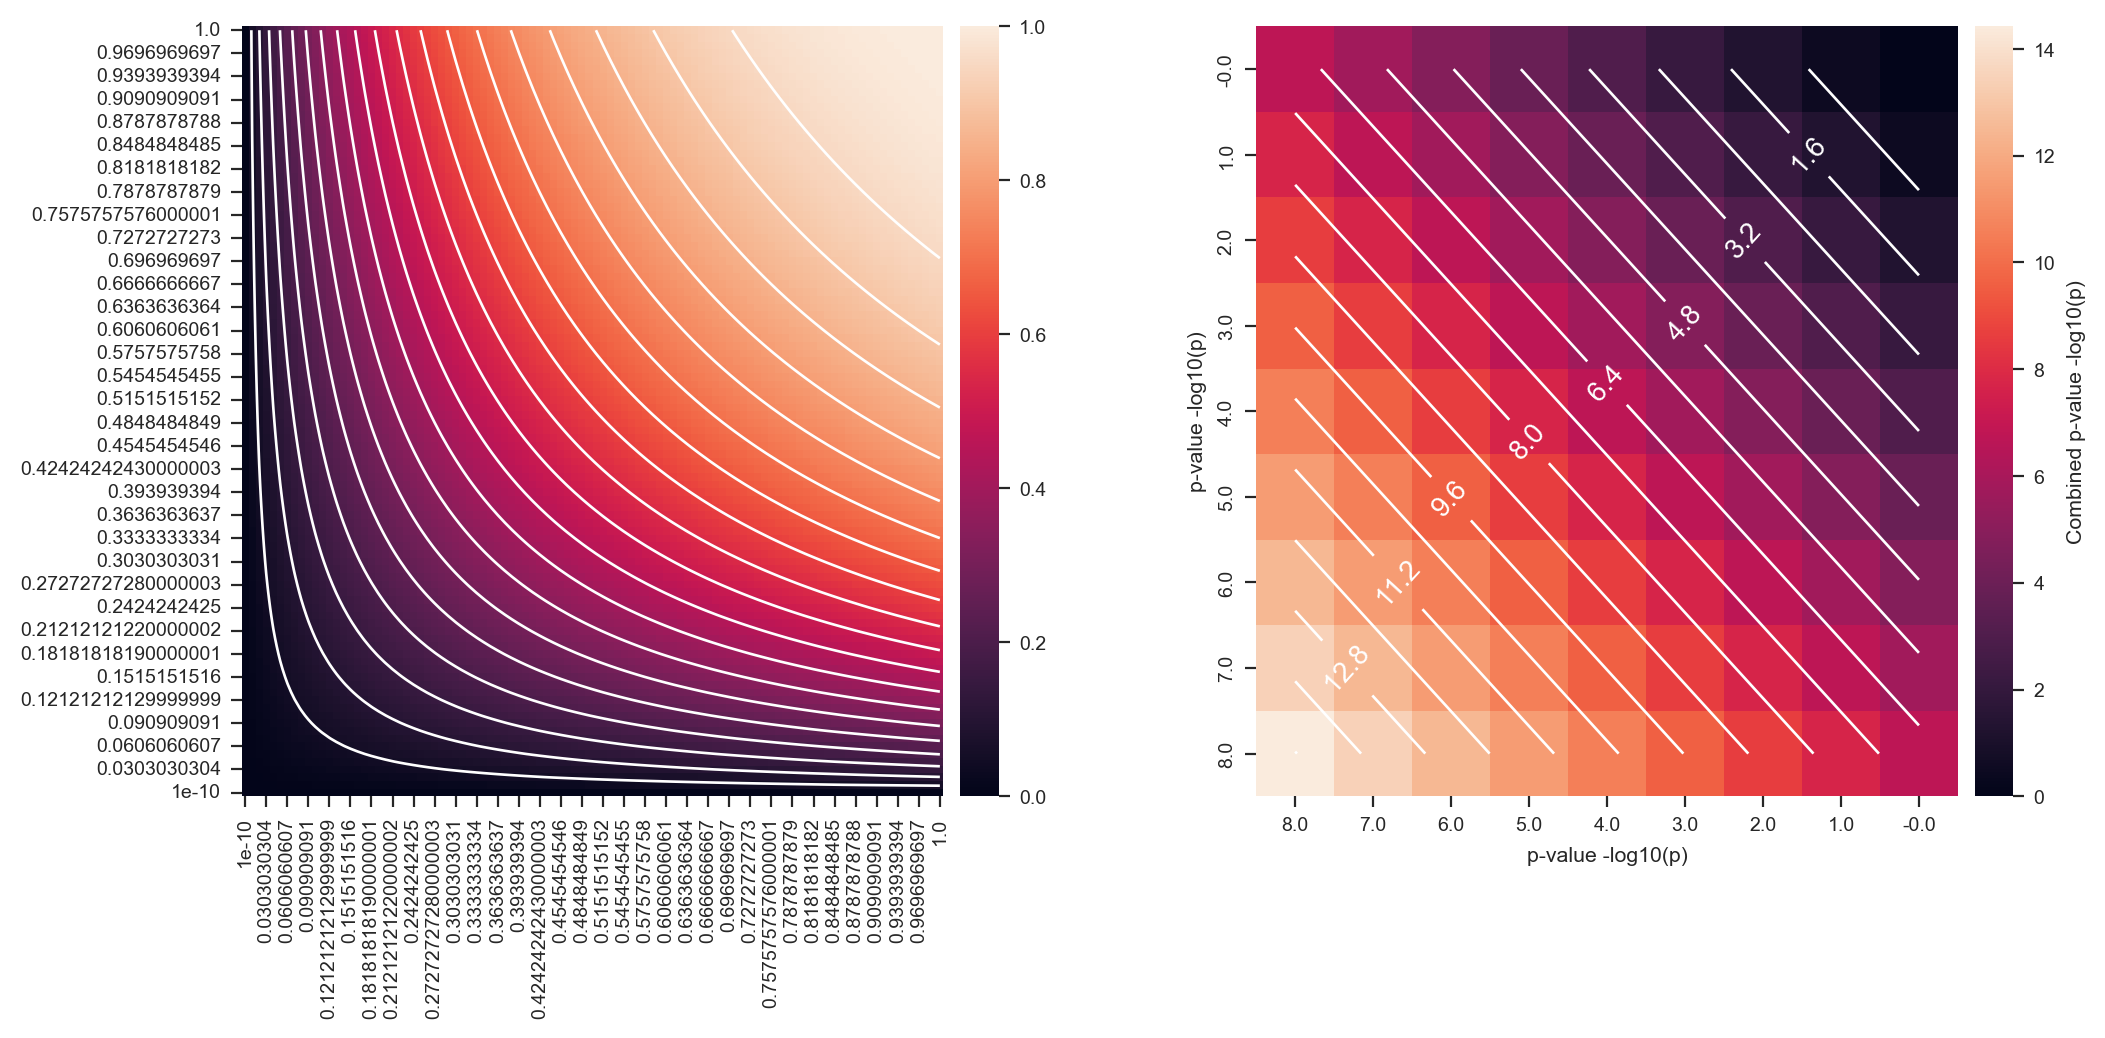

In [4]:
def fisher_method(pvalues):
    df = 2* len(pvalues)
    return 1-chi2.cdf(-2*sum(map(log, pvalues)), df)
    
n = 100
x = np.linspace(1e-10, 1, n)
a = np.array(list(itertools.product(x, x)))
b = np.apply_along_axis(fisher_method, 1, a)
c = b.reshape(n, n)
data = pd.DataFrame(c)
data.index = x
data.columns = x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(data=data, cbar_kws={'pad': 0.02}, ax=ax1)
ax1.contour(np.arange(.5, data.shape[1]), np.arange(.5, data.shape[0]), data, levels=20, colors='white')
ax1.invert_yaxis()

def fisher_method_log10(pvalues):
    df = 2* len(pvalues)
    return -np.log10(1-chi2.cdf(-2*sum(map(log, pvalues)), df))
    # return 1-chi2.cdf(-2*sum(map(log, pvalues)), df)

pmin = -8
n = -pmin*1+1
# x = np.logspace(1e-10, 1, n)
x = np.logspace(-8, 0, n)
a = np.array(list(itertools.product(x, x)))
b = np.apply_along_axis(fisher_method_log10, 1, a)
c = b.reshape(n, n)
data = pd.DataFrame(c)
data.index = np.round(-np.log10(x), 1)
data.columns = np.round(-np.log10(x), 1)

sns.heatmap(data=data, cbar_kws={'pad': 0.02, 'label': 'Combined p-value -log10(p)'}, ax=ax2)
cs = ax2.contour(np.arange(.5, data.shape[1]), np.arange(.5, data.shape[0]), data, levels=20, colors='white')

def fmt(x):
    return np.round(x,2)

ax2.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)
ax2.invert_yaxis()
plt.xlabel('p-value -log10(p)')
plt.ylabel('p-value -log10(p)') ;

`comb` callable with cache:

In [5]:
import scipy

class Comb():

    cache = {}
    
    def __init__(self):
        pass

    def __call__(self, n, k, exact=True):
        if (n, k) not in self.cache:
            self.cache[(n, k)] = scipy.special.comb(n, k, exact=exact)
        return self.cache[(n, k)]

    @classmethod
    def clear(cls):
        cls.cache = {}

    def __enter__(self):

        def init_worker(data):
            # declare scope of a new global variable
            global comb
            # store argument in the global variable for this process
            comb = data
            
        self.pool = multiprocess.Pool(processes=8, initializer=init_worker, initargs=(self,))
        return self.pool

    def __exit__(self, type, value, tb):
        self.pool.close()

Comb().clear()
comb = Comb()

with Comb() as pool:
    pass

## Combinatorial results and functions for run probabilities

In [6]:
def get_coalescence_runs(all_times, clade_times):
    clade_times_set = set(clade_times)
    k, fn = 1, 1
    coalescence_runs = []
    first_derived_coal_found = False
    for t in all_times:
        is_derived = int( t in clade_times_set)
        if first_derived_coal_found:
            coalescence_runs.append(is_derived)
        if is_derived:
            # get all the coalescences *after* the first derived one. So that the first can be both 0 and 1
            first_derived_coal_found = True
    return np.array(coalescence_runs)

def get_runs_of_1s(bits):
    for bit, group in itertools.groupby(bits):
        if bit:
            yield sum(group)

def get_all_runs(bits):
    for bit, group in itertools.groupby(bits):
        if bit:
            yield sum(group)
    bits = np.absolute(bits - 1)
    for bit, group in itertools.groupby(bits):
        if bit:
            yield sum(group)

### PDF of the number of runs of zeros and ones

If r is odd:

$\displaystyle p(r) = \frac{\binom{n_1-1}{k} \binom{n_2-1}{k-1} + \binom{n_1-1}{k-1} \binom{n_2-1}{k} }{ \binom{n_1+n_2}{n_1}}$

where $\displaystyle k = \frac{r-1}{2}$

If r is even:

$\displaystyle p(r) = \frac{2 \binom{n_1-1}{k} \binom{n_2-1}{k-1} }{ \binom{n_1+n_2}{n_1}}$

where $\displaystyle k = \frac{r}{2}$


Got it [here](http://www.statistics4u.com/fundstat_eng/ee_runs_test.html)

In [7]:
def prob_nr_of_runs(n, n1, n2):
    """
    Probability of the number runs of either zeros or ones
    n: number of runs
    n0: nr zeros
    n1: nr ones
    """
    if n % 2:
        # uneven
        k = (n - 1) //  2
        return (comb(n1-1, k)*comb(n2-1, k-1) + comb(n1-1, k-1)*comb(n2-1, k)) / comb(n1+n2, n1)
    else:
        # even
        k = n // 2
        return 2*comb(n1-1, k-1)*comb(n2-1, k-1) / comb(n1+n2, n1)    

### Compute cached probabilities

In [8]:
%%time
import multiprocess
pool = multiprocess.Pool(processes=8)

n = 200
dim = 2*n+1
cache = np.ndarray(shape=(n+1, n+1, 2*n+1), dtype=float)
cache[:, :, :] = np.nan
for n0 in tqdm(range(1, n+1)):
    for n1 in range(1, n+1):
        for r in range(1, n0+n1):
            cache[n0, n1, r] = prob_nr_of_runs(r, n0, n1)

pool.close()

np.save('prob_nr_of_runs_cache.npy', cache)

  0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 9.78 s, sys: 193 ms, total: 9.97 s
Wall time: 10.2 s


### Compute p-values for data

In [9]:
prob_nr_of_runs_cache = np.load('prob_nr_of_runs_cache.npy')

for treeseq_file_name in [
                          # '../data/chromhapX_tskit.trees',
                          '../data/Ethiopian_Olive_relate_chromhapX.trees',
                          '../data/Mikumi_relate_chromhapX.trees',
                          '../data/Tanzania_Olive_relate_chromhapX.trees',
                          '../data/Eastern_Yellow_relate_chromhapX.trees'
                         ]:
    print(os.path.basename(treeseq_file_name))
    
    output_file_name = modpath(treeseq_file_name, parent='../results', suffix='_runstats.h5')
    
    tree_seq = tskit.load(treeseq_file_name)
    
    
    nr_samples = tree_seq.num_samples
    
    records = []
    nodes_time = tree_seq.nodes_time

    tree_idx = 0
    for tree in tqdm(tree_seq.trees()):
    
        N = tree.num_samples()
        all_times = [nodes_time[n] for n in tree.timedesc() if not tree.is_leaf(n)]
        for mut in tree.mutations():
            node = tree_seq.mutations_node[mut.id]
            clade_times = [nodes_time[n] for n in tree.timedesc(node) if not tree.is_leaf(n)]

            # nr-all-runs and max ones-run probabilities
            runs = get_coalescence_runs(all_times, clade_times)

            if len(runs) < nr_samples / 4:
                continue
            
            n1 = sum(runs)
            n0 = len(runs) - n1
            run_lengths = np.fromiter(get_all_runs(runs), int)
            runs_of_1s = list(get_runs_of_1s(runs))

            if len(runs_of_1s) == 0:
                # trippleton or smaller
                continue


            # # TODO: Filter on der and/or anc allele freq

            # if n1/(n0+n1) < 10:
            #     continue
                        
            max_ones_run_len = max(runs_of_1s)
            nr_runs = run_lengths.size

            
            # if sum(runs) < 2 or sum(runs) == len(runs) or max_ones_run_len == 1:
            #     pvalue_max_der_run = np.nan
            # else:
            #     try:
            #         pvalue_max_der_run = prob_longest_der_run_cache[n0, n1, max_ones_run_len:(n0+n1)].sum()
            #     except IndexError:
            #         pvalue_max_der_run = sum(prob_longest_1s_run(n0+n1, x, n1/(n0+n1)) for x in range(max_ones_run_len, n0+n1))

            
            if nr_runs == 1 or len(runs) <= 2 or nr_runs == len(runs):
                pvalue_nr_runs = np.nan
            else:
                try:
                    pvalue_nr_runs = prob_nr_of_runs_cache[n0, n1, 1:(nr_runs+1)].sum()
                except IndexError:
                    pvalue_nr_runs = sum(prob_nr_of_runs(x, n0, n1) for x in range(1, nr_runs+1))
            
            interval = tree.interval
            num_mutations = tree.num_mutations

            clade_left, clade_right = interval.left, interval.right

            assert clade_times
            
            records.append(['nr_runs',
                            mut.site, 
                            pvalue_nr_runs,
                            nr_runs,
                            len(runs),                            
                            clade_times[0], 
                            0,
                            interval.left,
                            interval.right,
                            clade_left, 
                            clade_right,
                            num_mutations])
    
    
        tree_idx += 1
    
    
    df = pd.DataFrame.from_records(records, columns=['stat_name', 'site', 'p', 'stat', 'nr_coal', 't1', 't2', 
                                                     'tree_left', 'tree_right', 'clade_left', 'clade_right', 
                                                     'nr_mut'])
    df['pos'] = tree_seq.sites_position[df.site]
    df.to_hdf(output_file_name, 'df', format='table')
    

Ethiopian_Olive_relate_chromhapX.trees


  0%|          | 0/20175 [00:00<?, ?it/s]

Mikumi_relate_chromhapX.trees


  0%|          | 0/44187 [00:00<?, ?it/s]

Tanzania_Olive_relate_chromhapX.trees


  0%|          | 0/36102 [00:00<?, ?it/s]

Eastern_Yellow_relate_chromhapX.trees


  0%|          | 0/59139 [00:00<?, ?it/s]

In [16]:
df = pd.read_hdf('../results/Ethiopian_Olive_relate_chromhapX_runstats.h5')
# df = pd.read_hdf('../results/Eastern_Yellow_relate_chromhapX_runstats.h5')
# df = pd.read_hdf('../results/Mikumi_relate_chromhapX_runstats.h5')
# tanzania_olive_scan = pd.read_hdf('../results/Tanzania_Olive_relate_chromhapX_runstats.h5')
#df = pd.read_hdf('../results/chromhapX_tskit_runstats.h5')
df.head()

stat_name  site         p  stat  nr_coal           t1  t2  tree_left  \
0   nr_runs     1  1.000000     7       21  5091.139648   0        0.0   
1   nr_runs     2  0.489169    12       25  5102.022949   0  2501401.0   
2   nr_runs     3  0.535247     8       18  1115.526611   0  2501401.0   
3   nr_runs     6  0.535247     8       18  1115.526611   0  2501401.0   
4   nr_runs     8  0.239165     9       24  4883.755859   0  2501401.0   

   tree_right  clade_left  clade_right  nr_mut        pos  
0   2501401.0         0.0    2501401.0       2  2501041.0  
1   2515636.0   2501401.0    2515636.0      14  2501401.0  
2   2515636.0   2501401.0    2515636.0      14  2501589.0  
3   2515636.0   2501401.0    2515636.0      14  2503188.0  
4   2515636.0   2501401.0    2515636.0      14  2508577.0

In [17]:
df.stat_name.unique()

array(['nr_runs'], dtype=object)

(array([86691., 42434., 18970.,  8958.,  4695.,  1973.,  1539.,   636.,
          612.,   557.]),
 array([  1. ,  22.2,  43.4,  64.6,  85.8, 107. , 128.2, 149.4, 170.6,
        191.8, 213. ]),
 <BarContainer object of 10 artists>)

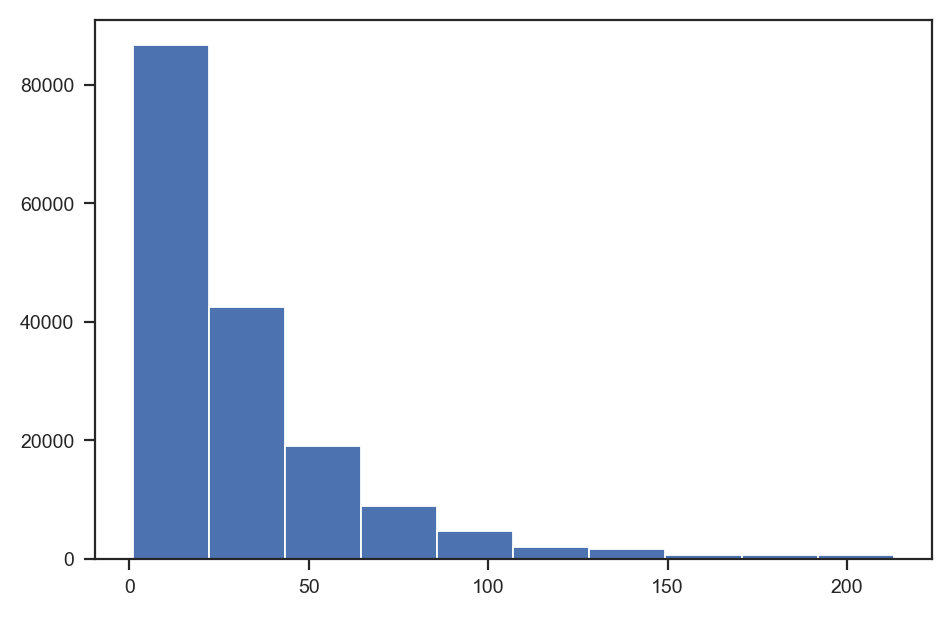

In [18]:
plt.hist(df.nr_mut)

### Manhattan plots

In [19]:
# plot_df = df.loc[df.stat_name == 'nr_runs']
# plot_df = df.loc[(df.stat_name == 'nr_runs') & (df.stat < 6) & (df.nr_mut > 10)]
plot_df = df.loc[(df.stat_name == 'nr_runs') & (df.nr_mut > 20)]
plot_df['-log10p'] = -np.log10(plot_df.p)
np.log10(plot_df.index.size)

/var/folders/s6/srs8qkh52w1_h32d65z95tth0000gn/T/ipykernel_33488/522570660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['-log10p'] = -np.log10(plot_df.p)


4.9377585428261845

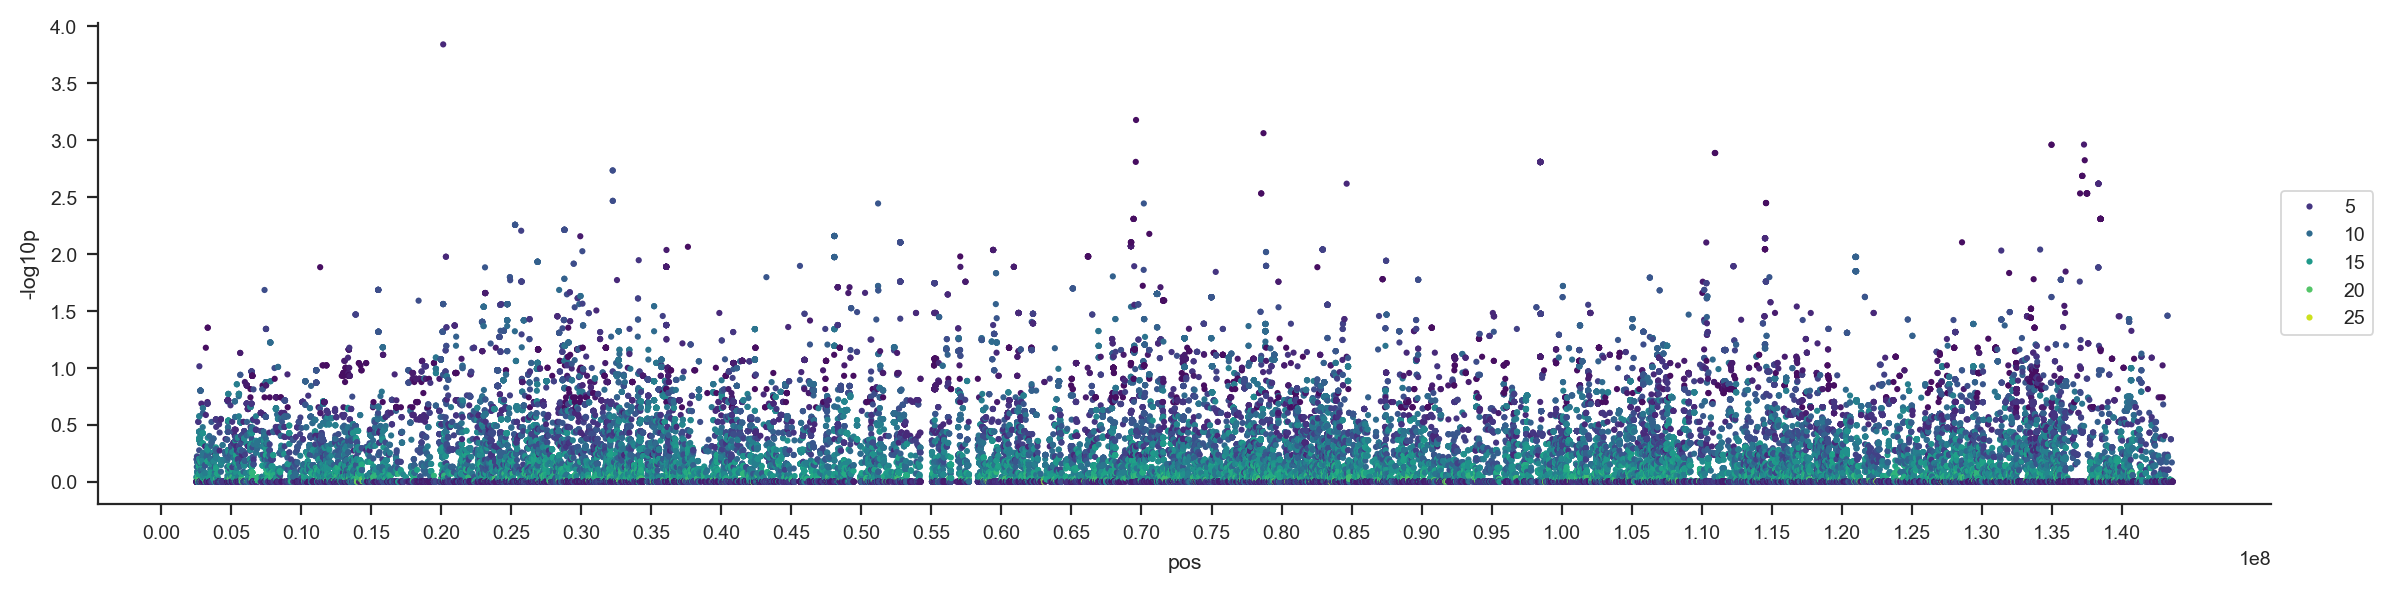

In [20]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(1, 1, figsize=(12,3))
    sns.scatterplot(data=plot_df, x='pos', y='-log10p', hue='stat', palette='viridis', ax=ax, linewidth=0, s=5) ;
    ax.set_xticks(np.arange(0, max(df.pos)+1, 5000000))
    # ax.axhline(-np.log10(0.001), color='red', linestyle='dashed') ;
    # ax.get_legend().remove()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    sns.despine()

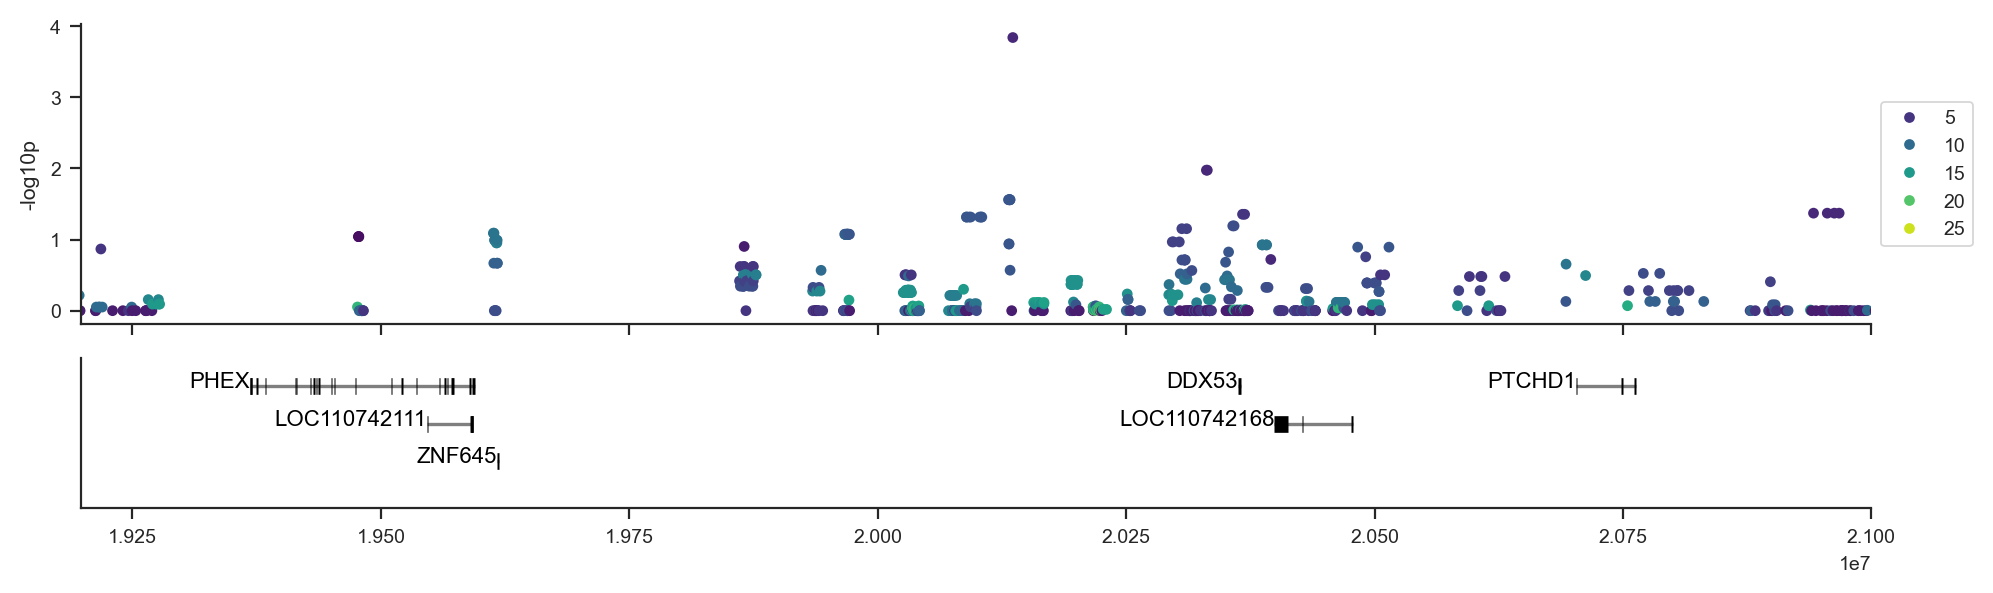

In [21]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)    
    ax = gi.gene_plot('chrX', 19_500_000, 21_000_000, 'papAnu4', figsize=(10,3), aspect=0.5)
    sns.scatterplot(data=plot_df, x='pos', y='-log10p', hue='stat', palette='viridis', ax=ax, linewidth=0, s=15) ;
    # ax.get_legend().remove()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    plt.tight_layout()
    sns.despine()

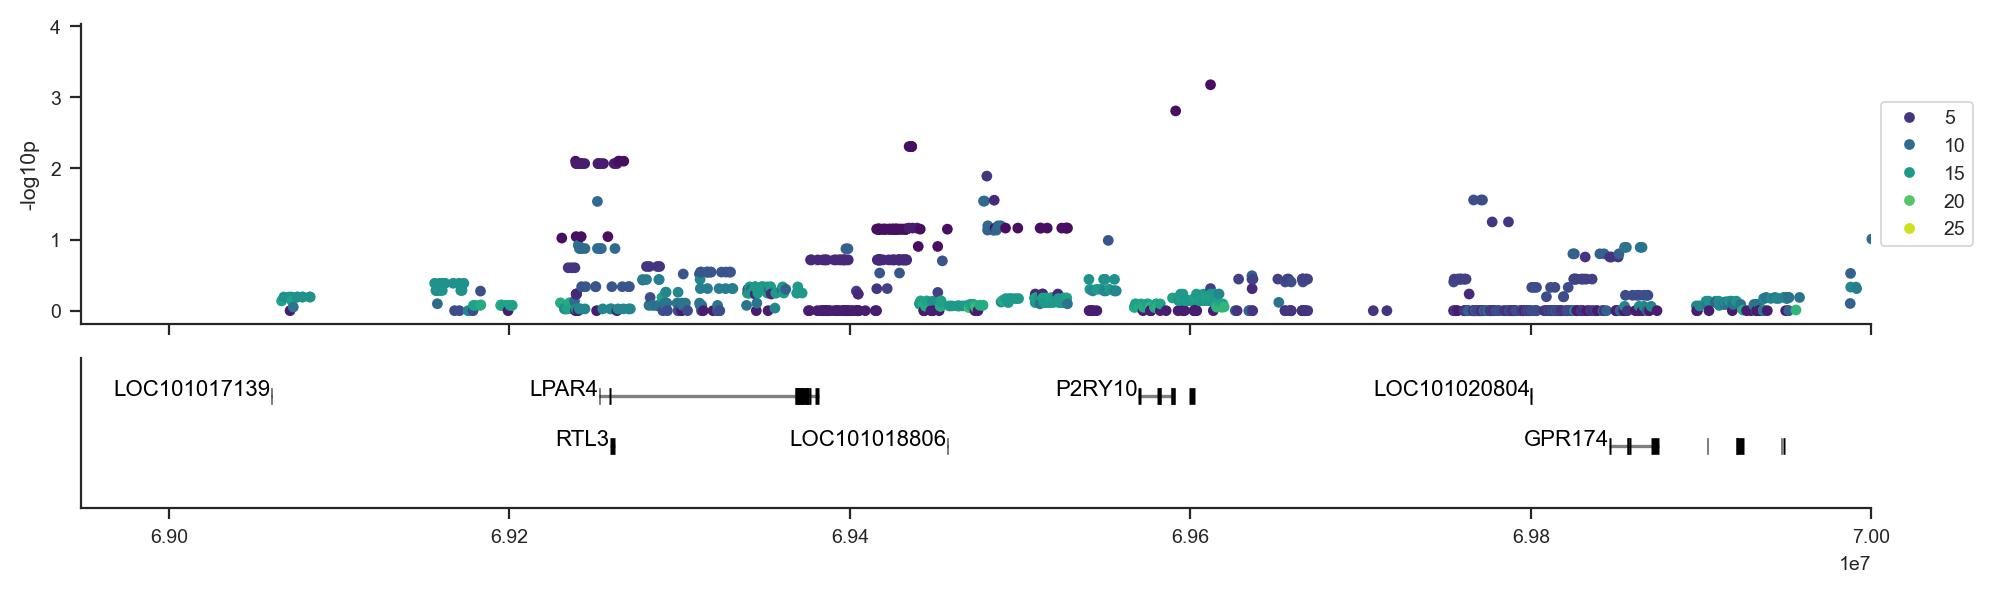

In [22]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)    
    ax = gi.gene_plot('chrX', 69_000_000, 70_000_000, 'papAnu4', figsize=(10,3), aspect=0.5)
    sns.scatterplot(data=plot_df, x='pos', y='-log10p', hue='stat', palette='viridis', ax=ax, linewidth=0, s=15) ;
    # ax.get_legend().remove()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    sns.despine()

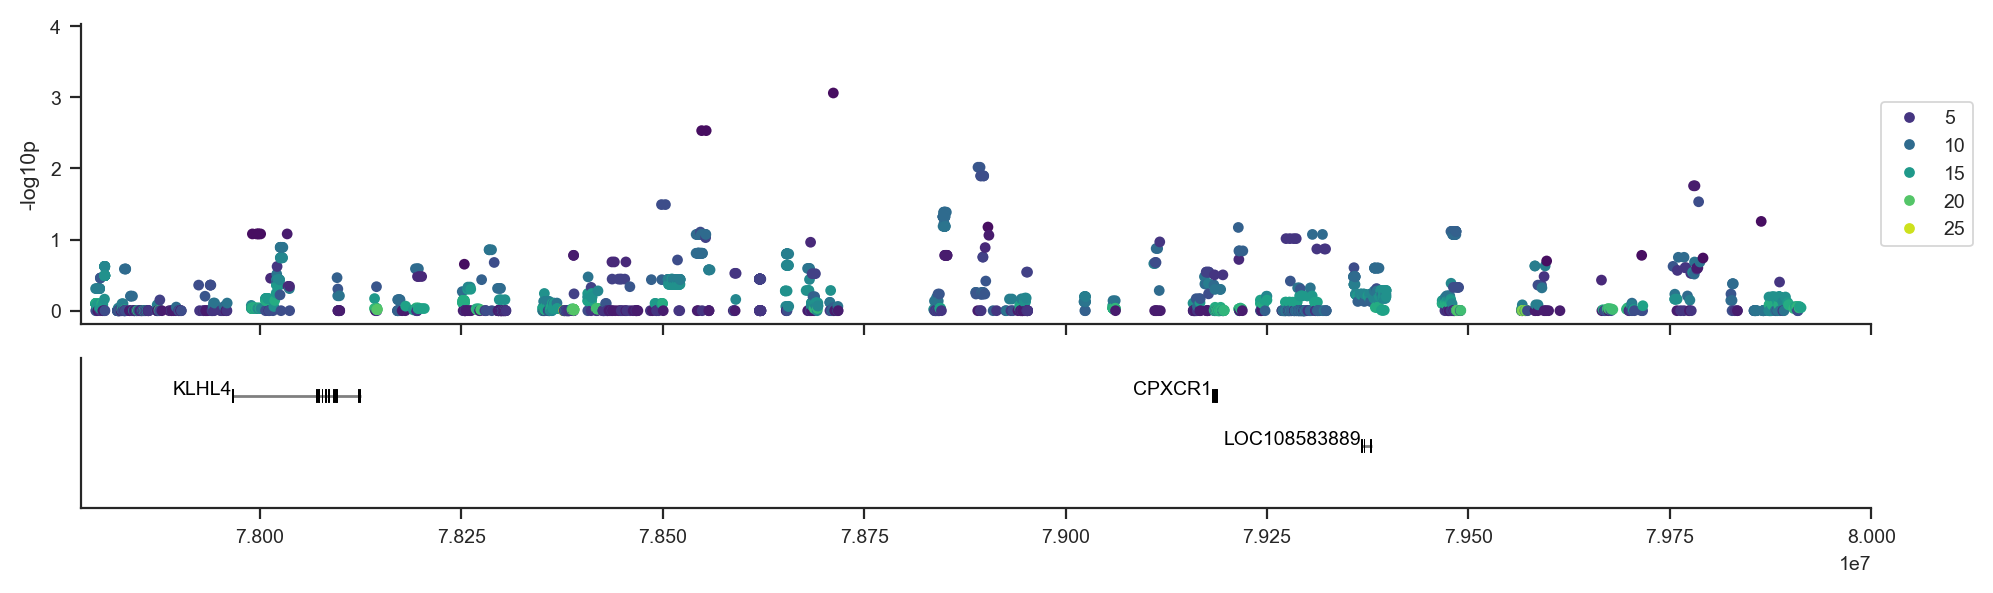

In [23]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    ax = gi.gene_plot('chrX', 78_000_000, 80_000_000, 'papAnu4', figsize=(10,3), aspect=0.5)
    sns.scatterplot(data=plot_df, x='pos', y='-log10p', hue='stat', palette='viridis', ax=ax, linewidth=0, s=15) ;
    # ax.get_legend().remove()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    plt.tight_layout()
    sns.despine()

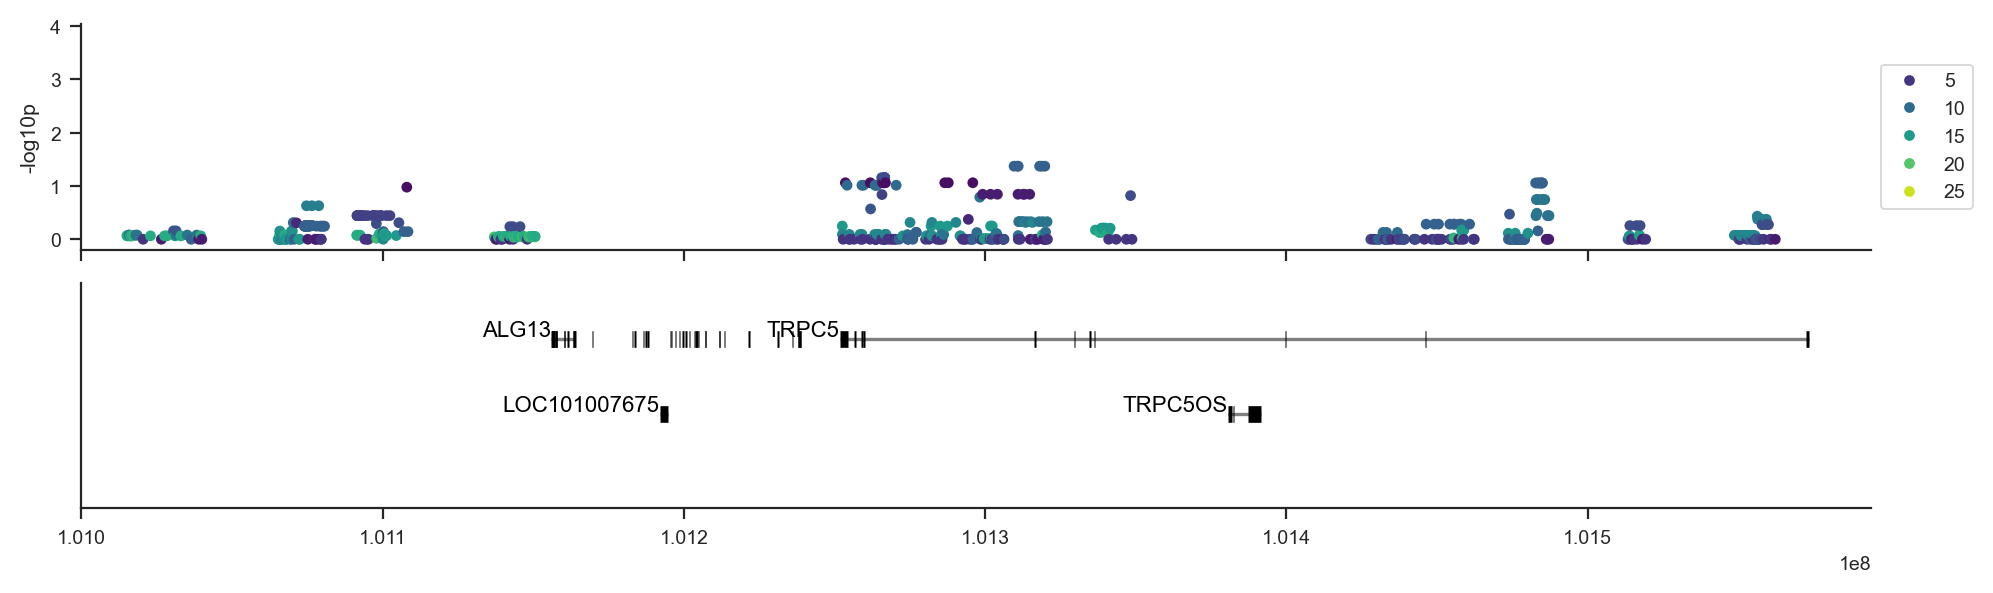

In [24]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    ax = gi.gene_plot('chrX', 101_000_000, 101_500_000, 'papAnu4', figsize=(10,3), aspect=1)
    sns.scatterplot(data=plot_df, x='pos', y='-log10p', hue='stat', palette='viridis', ax=ax, linewidth=0, s=15) ;
    # ax.get_legend().remove()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    sns.despine()

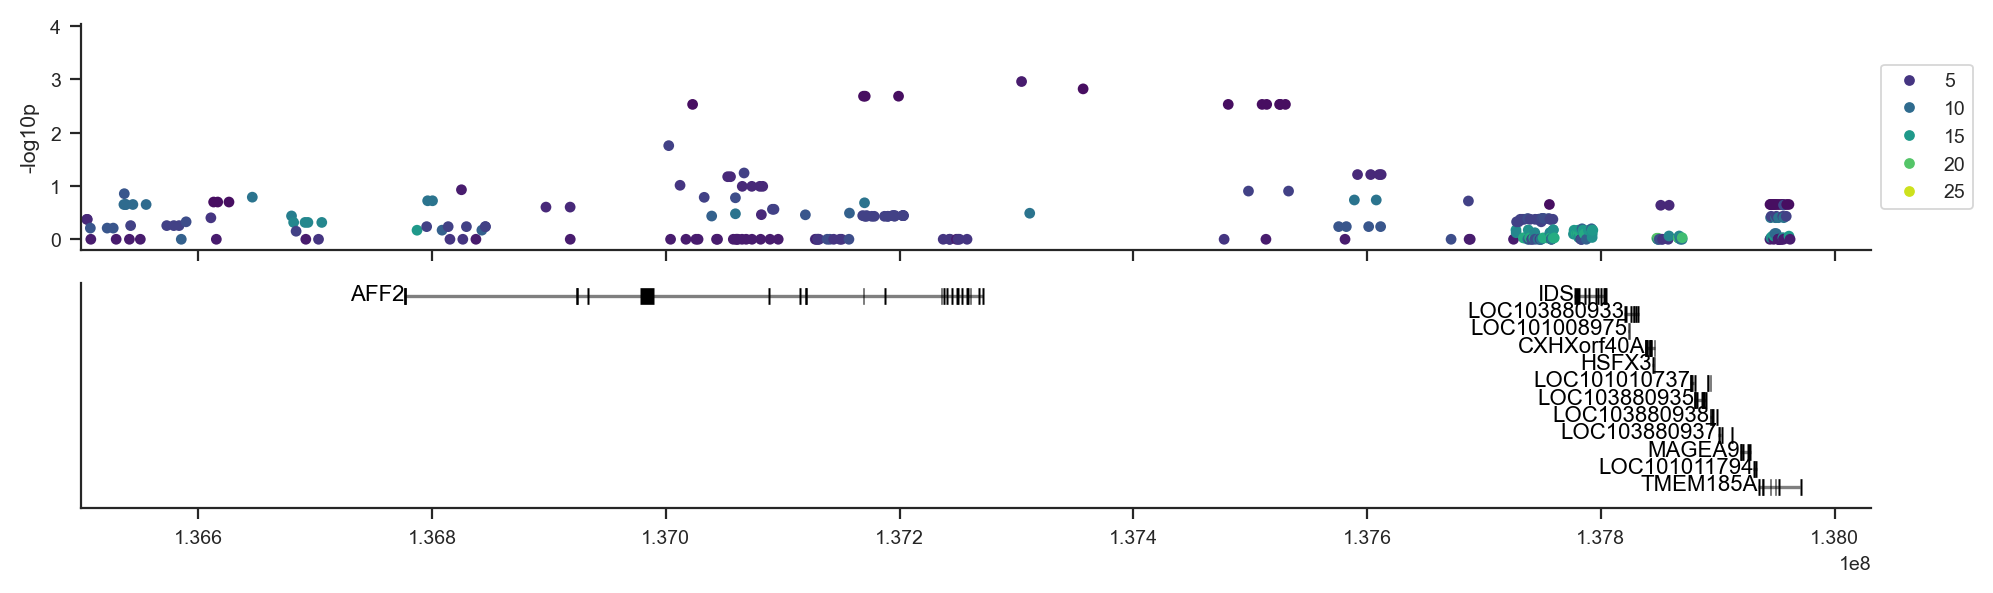

In [25]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    ax = gi.gene_plot('chrX', 136_500_000, 138_000_000, 'papAnu4', figsize=(10,3), aspect=1)
    sns.scatterplot(data=plot_df, x='pos', y='-log10p', hue='stat', palette='viridis', ax=ax, linewidth=0, s=15) ;
    # ax.get_legend().remove()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    plt.tight_layout()
    sns.despine()